## Librerías

In [134]:
# Manejo de dataframes
import pandas as pd

# Manejo de vectores y matrices
import numpy as np

# Gráficas - EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modelamiento enfocado en predicción
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# Regresion Lineal
from scipy.stats import randint as sp_randint
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


## Carga de Datos

In [3]:
# Monta el drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Datos de 2020 al 2024

In [4]:
# Extrayendo los datos de 2020 al 2024

file_names = ['2020gas.csv', '2021gas.csv', '2022gas.csv', '2023gas.csv', '2024gas.csv']
path = '/content/drive/MyDrive/Colab Notebooks/0.TFM_VIU/datos'
dfs = []

for file_name in file_names:
    file_path = f"{path}/{file_name}"
    encoding_options = ['utf-8', 'latin-1', 'ISO-8859-1', 'cp1252', 'utf-16']
    for encoding in encoding_options:
        try:
            df = pd.read_csv(file_path, encoding=encoding, sep=",")
            dfs.append(df)
            print(f"Archivo '{file_name}' leído con codificación '{encoding}'.")
            break
        except Exception as e:
            print(f"Error al leer archivo '{file_name}' con codificación '{encoding}': {e}")

df1 = pd.concat(dfs, ignore_index=True)
df1.head(5)


Archivo '2020gas.csv' leído con codificación 'utf-8'.
Archivo '2021gas.csv' leído con codificación 'utf-8'.
Archivo '2022gas.csv' leído con codificación 'utf-8'.
Error al leer archivo '2023gas.csv' con codificación 'utf-8': 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte
Archivo '2023gas.csv' leído con codificación 'latin-1'.
Archivo '2024gas.csv' leído con codificación 'utf-8'.


,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,_id
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3,NaN
1,2020,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254,4,3,NaN
2,2020,Acura,MDX SH-AWD A-SPEC,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3,NaN
3,2020,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3,NaN
4,2020,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3,NaN


In [5]:
# Tamaño inicial

df1.shape

(4499, 16)

In [6]:
# Elimina _id en df1

df1 = df1.drop('_id', axis=1)

In [7]:
# Mostrando los datos

df1.head(5)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2020,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254,4,3
2,2020,Acura,MDX SH-AWD A-SPEC,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2020,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2020,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [8]:
# Tamaño del dataset

df1.shape

(4499, 15)

### Datos del 2015 al 2019

In [9]:
# Exrayendo los datos del 2015 al 2019

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0.TFM_VIU/datos/2015_2019gas.csv', encoding="utf-8", sep=",")
df2.head(5)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2015,Acura,ILX,Compact,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN
1,2015,Acura,ILX,Compact,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN
2,2015,Acura,ILX Hybrid,Compact,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN
3,2015,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN,NaN
4,2015,Acura,RDX AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN,NaN


In [10]:
# Tamaño del dataset

df2.shape

(5431, 15)

### Datos del 2005 al 2014

In [11]:
# Exrayendo los datos del 2005 al 2014

df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0.TFM_VIU/datos/2005-2014gas.csv', encoding="utf-8", sep=",")
df3.head(5)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN


In [12]:
# Tamaño del dataset

df3.shape

(10561, 15)

### Unificando datos de 2005 al 2024

In [13]:
# Se une los dataframes df1, df2, df3 en uno solo

df_combined = pd.concat([df3,df2, df1], ignore_index=True)
df_combined.head(5)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN


### Exploración de datos unificados

In [73]:
# Copia de df_combined
df = df_combined.copy()
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN


In [74]:
# Tamaño de df unificado del 2015 al 2024

df.shape


(20491, 15)

In [75]:
# Información de df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20491 non-null  int64  
 1   Make                  20491 non-null  object 
 2   Model                 20491 non-null  object 
 3   Vehicle class         20491 non-null  object 
 4   Engine size (L)       20491 non-null  float64
 5   Cylinders             20491 non-null  int64  
 6   Transmission          20491 non-null  object 
 7   Fuel type             20491 non-null  object 
 8   City (L/100 km)       20491 non-null  float64
 9   Highway (L/100 km)    20491 non-null  float64
 10  Combined (L/100 km)   20491 non-null  float64
 11  Combined (mpg)        20491 non-null  int64  
 12  CO2 emissions (g/km)  20491 non-null  int64  
 13  CO2 rating            8802 non-null   float64
 14  Smog rating           7696 non-null   float64
dtypes: float64(6), int6

In [76]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,8802.000000,7696.000000
mean,2014.229955,3.339408,5.826363,13.436060,9.714460,11.761354,25.746084,266.776731,4.628266,4.821985
std,5.581459,1.353656,1.869644,3.780372,2.520711,3.176397,7.026645,63.501551,1.581469,1.785805
min,2005.000000,0.800000,2.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2009.000000,2.200000,4.000000,10.800000,8.000000,9.600000,21.000000,221.000000,4.000000,3.000000
50%,2014.000000,3.000000,6.000000,13.000000,9.300000,11.300000,25.000000,262.000000,5.000000,5.000000
75%,2019.000000,4.000000,8.000000,15.500000,11.000000,13.400000,29.000000,304.000000,6.000000,6.000000
max,2024.000000,8.400000,16.000000,30.600000,22.100000,26.100000,71.000000,608.000000,10.000000,8.000000


## Prepocesamiento de los datos

### Limpieza de nulos

In [77]:
# Se retira las columnas del df CO2 rating, Smog rating  porque son también variables objetivos

df = df.drop(['CO2 rating', 'Smog rating'], axis=1)

In [78]:
# Información actualizada del df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20491 non-null  int64  
 1   Make                  20491 non-null  object 
 2   Model                 20491 non-null  object 
 3   Vehicle class         20491 non-null  object 
 4   Engine size (L)       20491 non-null  float64
 5   Cylinders             20491 non-null  int64  
 6   Transmission          20491 non-null  object 
 7   Fuel type             20491 non-null  object 
 8   City (L/100 km)       20491 non-null  float64
 9   Highway (L/100 km)    20491 non-null  float64
 10  Combined (L/100 km)   20491 non-null  float64
 11  Combined (mpg)        20491 non-null  int64  
 12  CO2 emissions (g/km)  20491 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.0+ MB


In [79]:
# Se verifica los nulos

df.isnull().sum()

Model year              0
Make                    0
Model                   0
Vehicle class           0
Engine size (L)         0
Cylinders               0
Transmission            0
Fuel type               0
City (L/100 km)         0
Highway (L/100 km)      0
Combined (L/100 km)     0
Combined (mpg)          0
CO2 emissions (g/km)    0
dtype: int64

### Limpieza de duplicados

In [80]:
# Se verifica si hay registros duplicados

duplicated_filas = df.duplicated().sum()

# Imprimiendo filas duplicadas
print("Filas duplicadas:", duplicated_filas)

Filas duplicadas: 0


In [81]:
# Transponiendo el DataFrame
transposed_df = df.T

# Verificando y encontrando columnas duplicadas
duplicated_columns = transposed_df[transposed_df.duplicated()].index.tolist()

# Imprimiendo columnas duplicadas
print("Columnas duplicadas:", duplicated_columns)

Columnas duplicadas: []


### Limpieza de Outliers

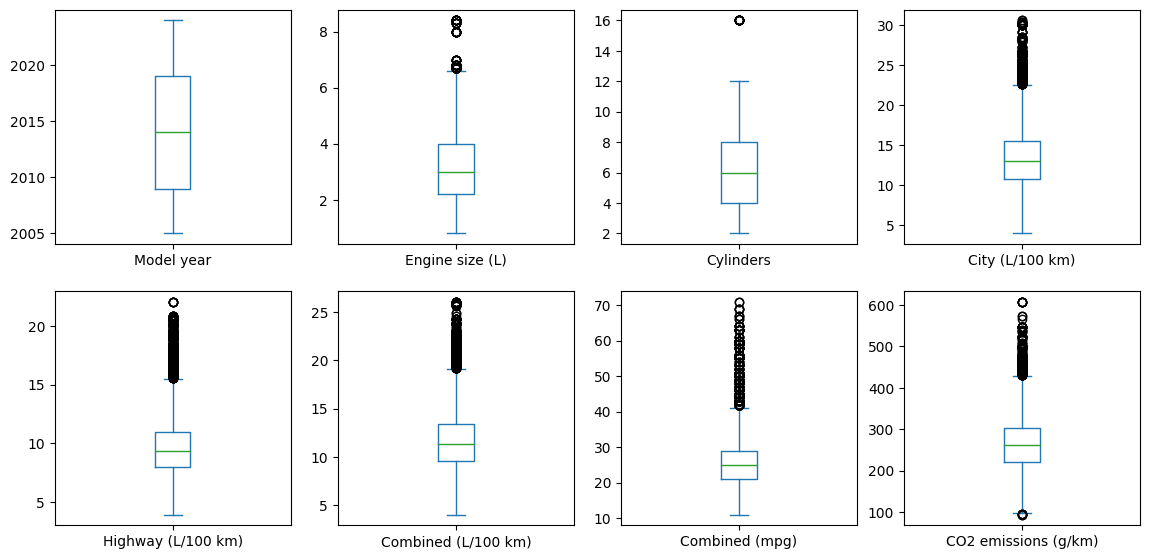

In [82]:
# Diagrana boxplot para visualizar los Outliers

df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

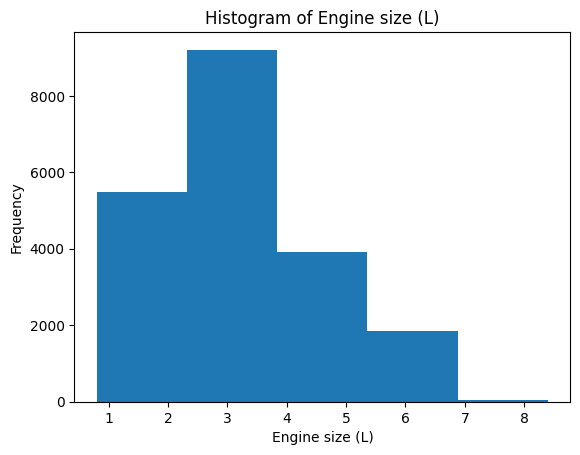

In [83]:
# Histograma de frecuencia basado en la variable Engine size (L)

plt.hist(df['Engine size (L)'], bins=5)
plt.xlabel('Engine size (L)')
plt.ylabel('Frequency')
plt.title('Histogram of Engine size (L)')
plt.show()

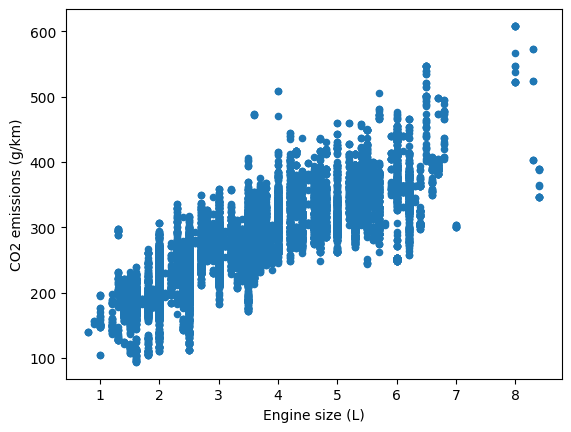

In [84]:
# Gráfico de dispersión entre  Engine size (L)  y CO2 emissions (g/km)

df.plot.scatter(x='Engine size (L)', y='CO2 emissions (g/km)')
plt.show()

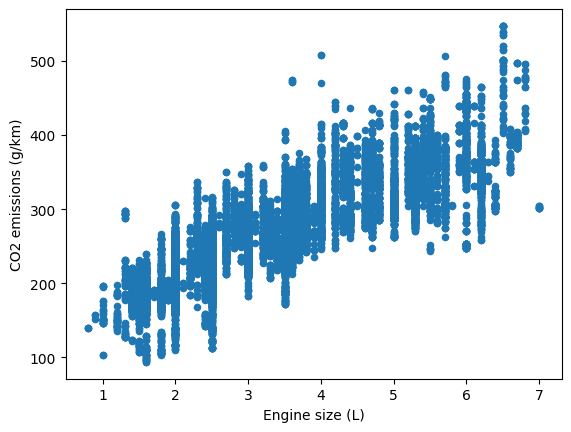

In [85]:
# Filtrado de df en el campo Engine size (L) que sea menor o igual a 7

df_filtrado = df[df['Engine size (L)'] <= 7]

# Diagrama de dispersión entre  Engine size (L)  y CO2 emissions (g/km)

df_filtrado.plot.scatter(x='Engine size (L)', y='CO2 emissions (g/km)')
plt.show()

In [86]:
# Tamaño de dataframe
df_filtrado.shape

(20455, 13)

In [87]:
# ----- Función para rastreo del mejor percentil superior para ajuste de outliers superiores
def HallaMejorPercentilSup(micol,  maximo, minimo, miCotaSup, dataframeA):
	for x in range(maximo, minimo, -1):
		valor_tope_actual = np.quantile(dataframeA.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaSup = {miCotaSup}")
		if(valor_tope_actual <= miCotaSup):
			return x , valor_tope_actual


In [88]:
# Proceso de corrección de Outlier Superior
columnas =  [4, 8, 9, 10, 11]
for col in columnas:
  q3=np.quantile(df_filtrado.iloc[ : , col] , 0.75)
  q1=np.quantile(df_filtrado.iloc[ : , col] , 0.25)
  IQR=q3-q1
  CotaSup=q3+1.5*IQR
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_filtrado)
  df_filtrado.iloc[ : , col] = np.where(df_filtrado.iloc[ : , col] > ValorTecho, ValorTecho, df_filtrado.iloc[ : , col] )


Percentil 99 = 6.5,col = 4, CotaSup = 6.699999999999999
Percentil 99 = 24.7,col = 8, CotaSup = 22.549999999999997
Percentil 98 = 22.9,col = 8, CotaSup = 22.549999999999997
Percentil 97 = 21.8,col = 8, CotaSup = 22.549999999999997
Percentil 99 = 18.1,col = 9, CotaSup = 15.5
Percentil 98 = 16.1,col = 9, CotaSup = 15.5
Percentil 97 = 15.2,col = 9, CotaSup = 15.5
Percentil 99 = 21.5,col = 10, CotaSup = 19.25
Percentil 98 = 19.8,col = 10, CotaSup = 19.25
Percentil 97 = 18.8,col = 10, CotaSup = 19.25
Percentil 99 = 48.0,col = 11, CotaSup = 43.5
Percentil 98 = 42.0,col = 11, CotaSup = 43.5


<ipython-input-88-2b458150eed0>:8: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_filtrado)


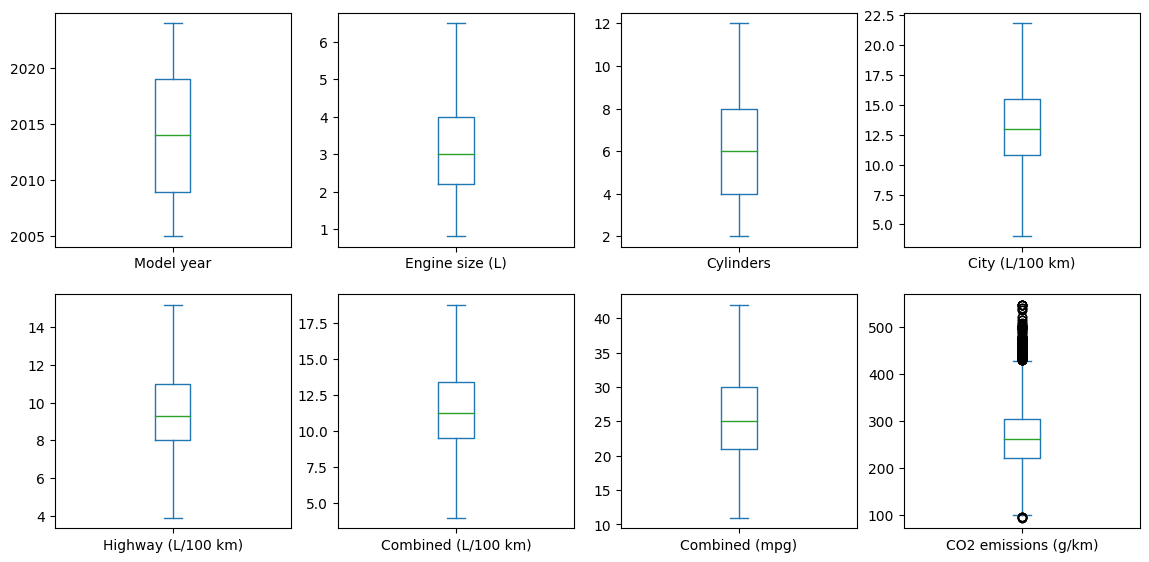

In [89]:
# Boxplot - Verificando que ya no hay outliers en las variables numéricas explicativas

df_filtrado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

### Exploración de datos

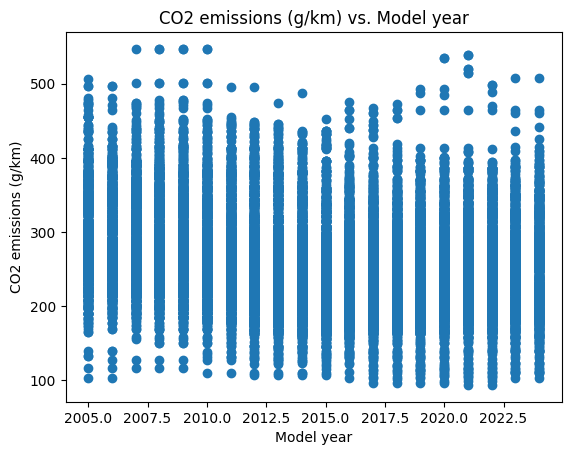

In [90]:
# Creando un gráfico de dispersion entre df_filtrado['Model year'] y df_filtrado['CO2 emissions']

plt.scatter(df_filtrado['Model year'], df_filtrado['CO2 emissions (g/km)'])
plt.xlabel('Model year')
plt.ylabel('CO2 emissions (g/km)')
plt.title('CO2 emissions (g/km) vs. Model year')
plt.show()


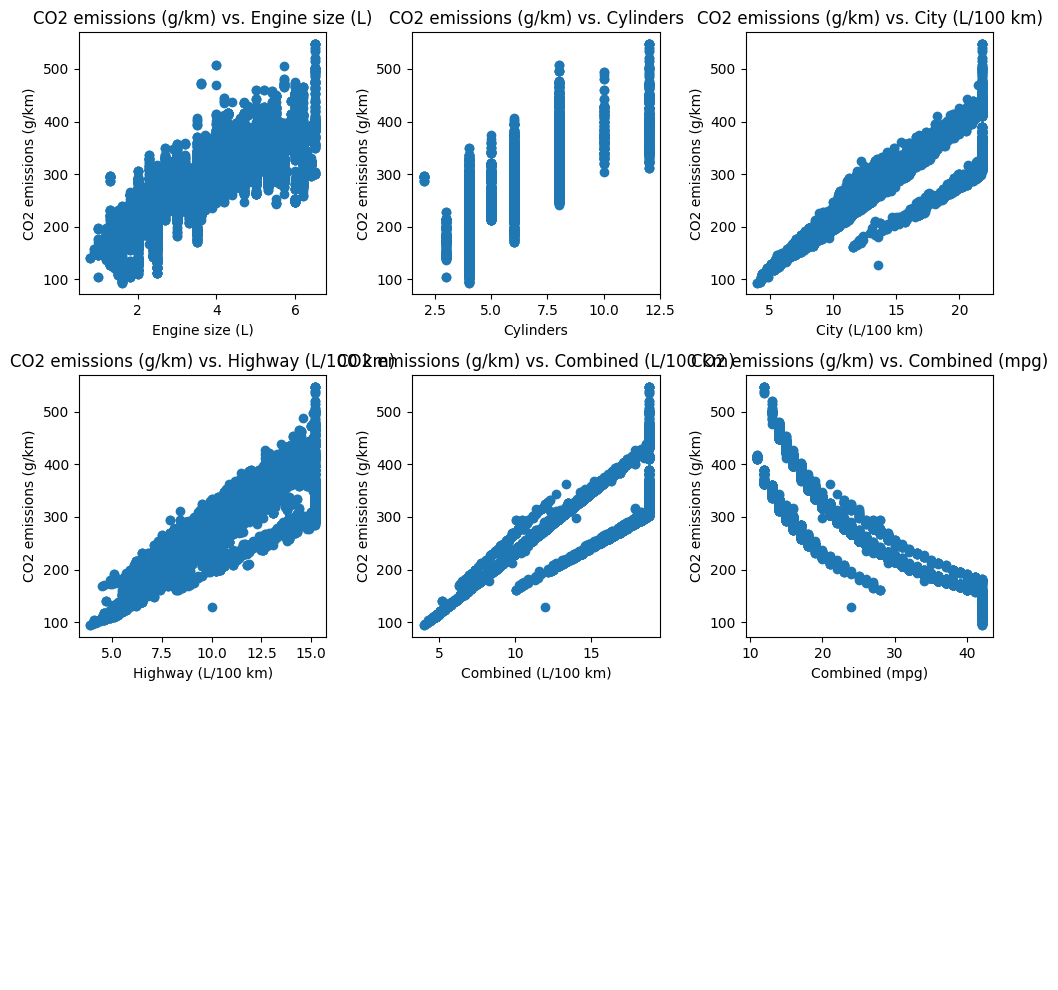

In [91]:
# Crea una lista de las columnas para x-axis
x_columns = ['Engine size (L)', 'Cylinders', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)']

# Configura subgráficos con layout (3, 3)
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Contador para recorrer los subgráficos
contador = 0

# Recorre cada columna para crear los gráficos de dispersión correspondientes
for i in range(3):
    for j in range(3):
        if contador < len(x_columns):
            # Crear un gráfico de dispersión para la columna actual
            axs[i, j].scatter(df_filtrado[x_columns[contador]], df_filtrado['CO2 emissions (g/km)'])
            axs[i, j].set_xlabel(x_columns[contador])
            axs[i, j].set_ylabel('CO2 emissions (g/km)')
            axs[i, j].set_title(f'CO2 emissions (g/km) vs. {x_columns[contador]}')
            contador += 1
        else:
            # Si se han mostrado todos los gráficos, ocultar el subgráfico
            axs[i, j].axis('off')

# Ajusta el espaciado entre subgráficos
plt.tight_layout()

# Muestra la figura con subgráficos
plt.show()

### Análisis estadístico

In [92]:
df_filtrado.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
count,20455.000000,20455.000000,20455.000000,20455.000000,20455.000000,20455.000000,20455.000000,20455.000000
mean,2014.230262,3.329313,5.814324,13.345299,9.639140,11.679105,25.603373,266.408702
std,5.580042,1.335567,1.844879,3.545500,2.310262,2.958272,6.455976,62.815043
min,2005.000000,0.800000,2.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2009.000000,2.200000,4.000000,10.800000,8.000000,9.500000,21.000000,221.000000
50%,2014.000000,3.000000,6.000000,13.000000,9.300000,11.300000,25.000000,261.000000
75%,2019.000000,4.000000,8.000000,15.500000,11.000000,13.400000,30.000000,304.000000
max,2024.000000,6.500000,12.000000,21.800000,15.200000,18.800000,42.000000,547.000000


## Transformación de datos

### Contando la frecuencia de variables categóricas

In [93]:
# Respaldo antes de aplicar LabelEncoder
df_filtradoRespaldo1 = df_filtrado.copy()

In [94]:
# Cuenta la frecuencia de cada valor único en la columna "Make"
frecuencia_make = df_filtrado['Make'].value_counts()

# Muestra la frecuencia de cada valor único
print("Frecuencia de cada valor único en la columna 'Make':")
print(frecuencia_make)

Frecuencia de cada valor único en la columna 'Make':
Make
Chevrolet        1884
Ford             1538
BMW              1363
Mercedes-Benz    1186
GMC              1179
Porsche          1008
Toyota            904
Audi              778
Dodge             726
Nissan            681
Volkswagen        585
Jeep              549
Hyundai           540
Kia               531
Mazda             524
Honda             520
Lexus             463
Subaru            456
Cadillac          453
MINI              443
Volvo             419
Jaguar            339
Chrysler          324
Mitsubishi        292
Infiniti          258
Buick             243
Land Rover        231
Acura             211
Lincoln           205
Ram               161
Pontiac           158
Maserati          153
Suzuki            127
Bentley           127
Lamborghini       123
Aston Martin      118
Rolls-Royce       116
Saab              115
FIAT               86
Saturn             83
Genesis            60
Alfa Romeo         56
Ferrari           

In [95]:
# Cuenta la frecuencia de cada valor único en la columna "Model"
frecuencia_model = df_filtrado['Model'].value_counts()

# Muestra la frecuencia de cada valor único en la columna "Model"
print("\nFrecuencia de cada valor único en la columna 'Model':")
print(frecuencia_model)



Frecuencia de cada valor único en la columna 'Model':
Model
Mustang                       96
Silverado                     83
Sierra                        83
Sierra 4WD                    78
Silverado 4WD                 78
                              ..
228i Cabriolet                 1
228i xDrive Coupe              1
320i xDrive Sedan              1
328d xDrive Sedan              1
Atlas 4MOTION Peak Edition     1
Name: count, Length: 3493, dtype: int64


In [96]:
# Cuenta la frecuencia de cada valor único en la columna "Vehicle class"
frecuencia_vehicleClass = df_filtrado['Vehicle class'].value_counts()

# Muestra la frecuencia de cada valor único en la columna "Model"
print("\nFrecuencia de cada valor único en la columna 'Vehicle class':")
print(frecuencia_vehicleClass)


Frecuencia de cada valor único en la columna 'Vehicle class':
Vehicle class
Mid-size                           2732
Compact                            2582
Sport utility vehicle: Small       2156
Sport utility vehicle              1980
Pickup truck: Standard             1834
Subcompact                         1756
Full-size                          1443
Sport utility vehicle: Standard    1425
Two-seater                         1207
Minicompact                         951
Station wagon: Small                787
Pickup truck: Small                 503
Minivan                             308
Station wagon: Mid-size             238
Van: Passenger                      222
Van: Cargo                          212
Special purpose vehicle             119
Name: count, dtype: int64


In [97]:
# Cuenta la frecuencia de cada valor único en la columna "Transmission"
frecuencia_Transmission = df_filtrado['Transmission'].value_counts()

# Muestra la frecuencia de cada valor único en la columna "Transmission"
print("\nFrecuencia de cada valor único en la columna 'Transmission':")
print(frecuencia_Transmission)


Frecuencia de cada valor único en la columna 'Transmission':
Transmission
AS6     2876
M6      2506
AS8     2185
A6      1944
A4      1848
M5      1164
A8       983
A5       889
AV       864
AM7      781
AS5      673
A9       634
AS7      618
AS10     506
A10      279
A7       276
AM8      232
AM6      215
AS4      162
AV6      159
AS9      158
AV7      157
M7       151
AV8      124
AV10      39
AV1       19
AM9        6
AM5        6
M4         1
Name: count, dtype: int64


In [98]:
# Cuenta la frecuencia de cada valor único en la columna "Fuel type"
frecuencia_FuelType = df_filtrado['Fuel type'].value_counts()

# Muestra la frecuencia de cada valor único en la columna "Fuel type"
print("\nFrecuencia de cada valor único en la columna 'Fuel type':")
print(frecuencia_FuelType)


Frecuencia de cada valor único en la columna 'Fuel type':
Fuel type
X    10173
Z     8879
E     1033
D      369
N        1
Name: count, dtype: int64


### Codificando con LabelEncoder()

In [99]:
#df_filtrado = df_filtradoRespaldo1.copy()

In [100]:
# Lista de nombres de columnas categóricas
columnas_categoricas = ['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type']

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar los datos
df_filtrado['Make_le'] = label_encoder.fit_transform(df_filtrado['Make'])
df_filtrado['Model_le'] = label_encoder.fit_transform(df_filtrado['Model'])
df_filtrado['Vehicle class_le'] = label_encoder.fit_transform(df_filtrado['Vehicle class'])
df_filtrado['Fuel type_le'] = label_encoder.fit_transform(df_filtrado['Fuel type'])
df_filtrado['Transmission_le'] = label_encoder.fit_transform(df_filtrado['Transmission'])


# Iterar sobre cada columna categórica y aplicar Label Encoding
#for columna in columnas_categoricas:
    # Aplicar Label Encoding y guardar los valores codificados en una nueva columna con el sufijo "_le"
    #df_filtrado[columna + '_le'] = label_encoder.fit_transform(df_filtrado[columna])

<ipython-input-100-b5260ad5b32e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Make_le'] = label_encoder.fit_transform(df_filtrado['Make'])
<ipython-input-100-b5260ad5b32e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Model_le'] = label_encoder.fit_transform(df_filtrado['Model'])
<ipython-input-100-b5260ad5b32e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [101]:
# Mostrar el DataFrame con las nuevas columnas codificadas
df_filtrado.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),Make_le,Model_le,Vehicle class_le,Fuel type_le,Transmission_le
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,0,1,0,3,1
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,0,1,0,3,26
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,0,2049,8,4,2
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,0,2197,14,4,13
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,0,2197,14,4,27


In [102]:
# Encuentra el valor mínimo de la variable "Make_le"
min_make = df_filtrado['Make_le'].min()

# Encuentra el valor máximo de la variable "Make_le"
max_make = df_filtrado['Make_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Make_le':")
print("Mínimo:", min_make)
print("Máximo:", max_make)


Rango de valores de 'Make_le':
Mínimo: 0
Máximo: 45


In [103]:
# Encuentra el valor mínimo de la variable "Model"
min_make = df_filtrado['Model_le'].min()

# Encuentra el valor máximo de la variable "Model"
max_make = df_filtrado['Model_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Model':")
print("Mínimo:", min_make)
print("Máximo:", max_make)

Rango de valores de 'Model':
Mínimo: 0
Máximo: 3492


In [104]:
# Encuentra el valor mínimo de la variable "Vehicle class_le"
min_make = df_filtrado['Vehicle class_le'].min()

# Encuentra el valor máximo de la variable "Vehicle class_le"
max_make = df_filtrado['Vehicle class_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Vehicle class_le':")
print("Mínimo:", min_make)
print("Máximo:", max_make)

Rango de valores de 'Vehicle class_le':
Mínimo: 0
Máximo: 16


In [105]:
# Encuentra el valor mínimo de la variable "Transmission_le"
min_make = df_filtrado['Transmission_le'].min()

# Encuentra el valor máximo de la variable "Transmission_le"
max_make = df_filtrado['Transmission_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Transmission_le':")
print("Mínimo:", min_make)
print("Máximo:", max_make)

Rango de valores de 'Transmission_le':
Mínimo: 0
Máximo: 28


In [106]:
# Encuentra el valor mínimo de la variable "Fuel type_le"
min_make = df_filtrado['Fuel type_le'].min()

# Encuentra el valor máximo de la variable "Fuel type_le"
max_make = df_filtrado['Fuel type_le'].max()

# Imprime el rango de valores mínimo y máximo
print("Rango de valores de 'Fuel type_le':")
print("Mínimo:", min_make)
print("Máximo:", max_make)

Rango de valores de 'Fuel type_le':
Mínimo: 0
Máximo: 4


In [107]:
# Respaldo después de aplicar LaberEncoder() con las variables categóricas
df_filtradoRespaldo2 = df_filtrado.copy()

In [108]:
# Elimina las columnas especificadas y asigna el resultado a un nuevo DataFrame
df_filtrado1 = df_filtrado.drop(['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type'], axis=1)

# Muestra el nuevo DataFrame -> con todas las 13 variables (numéricas y las categóricas codificadas)
df_filtrado1.head()


,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),Make_le,Model_le,Vehicle class_le,Fuel type_le,Transmission_le
0,2005,1.7,4,9.2,7.2,8.3,34,191,0,1,0,3,1
1,2005,1.7,4,9.1,7.3,8.3,34,191,0,1,0,3,26
2,2005,3.5,6,15.9,11.1,13.7,21,315,0,2049,8,4,2
3,2005,3.0,6,15.1,10.5,13.0,22,299,0,2197,14,4,13
4,2005,3.2,6,15.1,10.5,13.0,22,299,0,2197,14,4,27


In [109]:
# Elimina las columnas especificadas y asigna el resultado a un nuevo DataFrame
df_filtrado2 = df_filtrado.drop(['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type', 'Make_le', 'Model_le', 'Vehicle class_le', 'Transmission_le', 'Fuel type_le'], axis=1)

# Muestra el nuevo DataFrame -> con todas las 8 variables numéricas
df_filtrado2.head()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,2005,1.7,4,9.2,7.2,8.3,34,191
1,2005,1.7,4,9.1,7.3,8.3,34,191
2,2005,3.5,6,15.9,11.1,13.7,21,315
3,2005,3.0,6,15.1,10.5,13.0,22,299
4,2005,3.2,6,15.1,10.5,13.0,22,299


## Minería de datos

### Selección de variables numéricas

In [110]:
# Correlación de variables numéricas df_filtrado2
"""
  Model year
  Engine size (L)
  Cylinders
  City (L/100 km)
  Highway (L/100 km)
  Combined (L/100 km)
  Combined (mpg)
  CO2 emissions (g/km)
"""

'\n  Model year\n  Engine size (L)\n  Cylinders\n  City (L/100 km)\n  Highway (L/100 km)\n  Combined (L/100 km)\n  Combined (mpg)\n  CO2 emissions (g/km)\n'

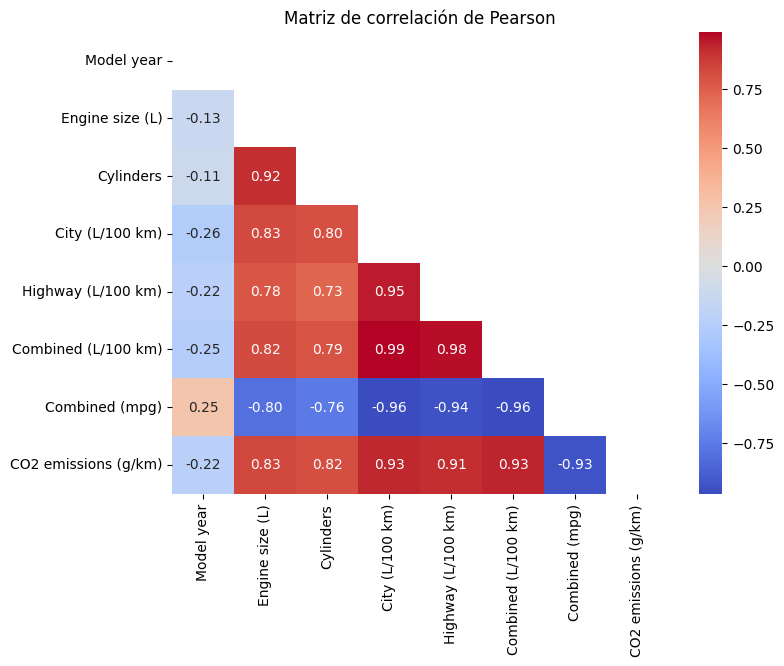

In [111]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = df_filtrado2.corr(method='pearson')

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de Pearson')
plt.show()

Se puede escoger entre:

'Combined (L/100 km)' y 'City (L/100 km)' porque tienen un 0.99 de correlación aportando multicolinealidad

In [112]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Separar las características (variables independientes) y la variable objetivo (dependiente)
X = df_filtrado2[['Model year', 'Engine size (L)', 'Cylinders', 'City (L/100 km)',
                    'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)']]
y = df_filtrado2['CO2 emissions (g/km)']

# Aplicar SelectKBest con f_regression para seleccionar las 5 mejores características
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]

print("Nuevas características:\n", X_new)
print("\nCaracterísticas seleccionadas:", selected_features)



Nuevas características:
 [[ 1.7  9.2  7.2  8.3 34. ]
 [ 1.7  9.1  7.3  8.3 34. ]
 [ 3.5 15.9 11.1 13.7 21. ]
 ...
 [ 2.   9.9  7.8  9.  31. ]
 [ 2.  10.6  8.3  9.6 29. ]
 [ 2.  10.9  8.6  9.8 29. ]]

Características seleccionadas: Index(['Engine size (L)', 'City (L/100 km)', 'Highway (L/100 km)',
       'Combined (L/100 km)', 'Combined (mpg)'],
      dtype='object')


Con el método SelectKBest expresa que las 5 mejores variables explicativas son:

Características seleccionadas:

Index(['Engine size (L)', 'City (L/100 km)', 'Highway (L/100 km)',
       'Combined (L/100 km)', 'Combined (mpg)'],
      dtype='object')

In [113]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extrae las columnas correspondientes del DataFrame
X = df_filtrado2[['Model year', 'Engine size (L)', 'Cylinders', 'City (L/100 km)',
                    'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)']]

# Añade una constante para el modelo de regresión
X = sm.add_constant(X)

# Calcula el VIF para cada variable explicativa
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrando el VIF
print(vif_data)


              Variable            VIF
0                const  146973.533741
1           Model year       1.122291
2      Engine size (L)       7.645837
3            Cylinders       6.954916
4      City (L/100 km)    1743.845595
5   Highway (L/100 km)     503.417737
6  Combined (L/100 km)    3941.103479
7       Combined (mpg)      14.927212


Se analiza el VIF y se determina que hay multicolinealidad potencialmente severa, ya que en las mayorías de las variables explicativas tienen un VIF superior a 5.

### Selección de variables categóricas

In [114]:
# Influencia de variables categóricas
"""
Make
Model
Vehicle class
Transmission
Fuel type
"""

'\nMake\nModel\nVehicle class\nTransmission\nFuel type\n'

In [115]:
df_filtradoRespaldo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20455 entries, 0 to 20490
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20455 non-null  int64  
 1   Make                  20455 non-null  object 
 2   Model                 20455 non-null  object 
 3   Vehicle class         20455 non-null  object 
 4   Engine size (L)       20455 non-null  float64
 5   Cylinders             20455 non-null  int64  
 6   Transmission          20455 non-null  object 
 7   Fuel type             20455 non-null  object 
 8   City (L/100 km)       20455 non-null  float64
 9   Highway (L/100 km)    20455 non-null  float64
 10  Combined (L/100 km)   20455 non-null  float64
 11  Combined (mpg)        20455 non-null  int64  
 12  CO2 emissions (g/km)  20455 non-null  int64  
 13  Make_le               20455 non-null  int64  
 14  Model_le              20455 non-null  int64  
 15  Vehicle class_le      20

In [116]:
# Lista de de columnas
columnas_categoricas_salida = ['Make_le', 'Model_le', 'Vehicle class_le', 'Transmission_le', 'Fuel type_le', 'CO2 emissions (g/km)']

df_filtradoCategoricas = df_filtradoRespaldo2[columnas_categoricas_salida].copy()

df_filtradoCategoricas.rename(columns={'Vehicle class_le': 'Vehicle_class_le'}, inplace=True)
df_filtradoCategoricas.rename(columns={'Fuel type_le': 'Fuel_type_le'}, inplace=True)
df_filtradoCategoricas.rename(columns={'CO2 emissions (g/km)': 'CO2_emissions(g/km)'}, inplace=True)

df_filtradoCategoricas.head()

,Make_le,Model_le,Vehicle_class_le,Transmission_le,Fuel_type_le,CO2_emissions(g/km)
0,0,1,0,1,3,191
1,0,1,0,26,3,191
2,0,2049,8,2,4,315
3,0,2197,14,13,4,299
4,0,2197,14,27,4,299


In [117]:
df_encoded = df_filtradoCategoricas.copy()

# Ajustar un modelo lineal utilizando ANOVA
formula = 'Q("CO2_emissions(g/km)") ~ C(Make_le) + C(Model_le) + C(Vehicle_class_le) + C(Transmission_le) + C(Fuel_type_le)'

model = ols(formula, data=df_encoded).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrando la tabla de ANOVA
print("Tabla de ANOVA:")
print(anova_table)

Tabla de ANOVA:
                           sum_sq       df           F  PR(>F)
C(Make_le)           6.961171e+06     45.0  608.761057     0.0
C(Model_le)          5.601731e+07   3492.0   63.128444     0.0
C(Vehicle_class_le)  1.336565e+06     16.0  328.735904     0.0
C(Transmission_le)   8.836464e+05     28.0  124.193130     0.0
C(Fuel_type_le)      4.519420e+05      4.0  444.631039     0.0
Residual             4.298536e+06  16916.0         NaN     NaN


De acuerdo al método ANOVA, se observa que p < 0.05 entonces todas las variables categóricas son significativas.

Se rechaza la hipótesis nula y se acepta la hipótesis alternativa.

Ho: No hay diferencia significativa

H1: Si hay diferencia significativa

In [118]:
# OJO EJEMPLO PARA LA MULTICOLINEALIDAD
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Crear un dataframe de ejemplo
data = {
    'Variable_A': ['A', 'B', 'A', 'B', 'A'],
    'Variable_B': ['X', 'Y', 'Y', 'X', 'X']
}
df2 = pd.DataFrame(data)

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df2['Variable_A'], df2['Variable_B'])

# Realizar el test de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir los resultados
print("Valor de Chi-cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Valores esperados:", expected)

Valor de Chi-cuadrado: 0.0
Valor p: 1.0
Grados de libertad: 1
Valores esperados: [[1.8 1.2]
 [1.2 0.8]]


### Separación de datos (train y test) y Normalización

In [119]:
df_filtrado1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20455 entries, 0 to 20490
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20455 non-null  int64  
 1   Engine size (L)       20455 non-null  float64
 2   Cylinders             20455 non-null  int64  
 3   City (L/100 km)       20455 non-null  float64
 4   Highway (L/100 km)    20455 non-null  float64
 5   Combined (L/100 km)   20455 non-null  float64
 6   Combined (mpg)        20455 non-null  int64  
 7   CO2 emissions (g/km)  20455 non-null  int64  
 8   Make_le               20455 non-null  int64  
 9   Model_le              20455 non-null  int64  
 10  Vehicle class_le      20455 non-null  int64  
 11  Fuel type_le          20455 non-null  int64  
 12  Transmission_le       20455 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 2.2 MB


In [120]:
# Actualizando los nombres de las variables
df_filtrado1.rename(columns={'Model year': 'Model_year'}, inplace=True)
df_filtrado1.rename(columns={'Engine size (L)': 'Engine_size(L)'}, inplace=True)
df_filtrado1.rename(columns={'City (L/100 km)': 'City(L/100 km)'}, inplace=True)
df_filtrado1.rename(columns={'Highway (L/100 km)': 'Highway(L/100 km)'}, inplace=True)
df_filtrado1.rename(columns={'Combined (L/100 km)': 'Combined(L/100 km)'}, inplace=True)
df_filtrado1.rename(columns={'Combined (mpg)': 'Combined(mpg)'}, inplace=True)
df_filtrado1.rename(columns={'CO2 emissions (g/km)': 'CO2_emissions(g/km)'}, inplace=True)
df_filtrado1.rename(columns={'Vehicle class_le': 'Vehicle_class_le'}, inplace=True)
df_filtrado1.rename(columns={'Fuel type_le': 'Fuel_type_le'}, inplace=True)

df_filtrado1.head()

,Model_year,Engine_size(L),Cylinders,City(L/100 km),Highway(L/100 km),Combined(L/100 km),Combined(mpg),CO2_emissions(g/km),Make_le,Model_le,Vehicle_class_le,Fuel_type_le,Transmission_le
0,2005,1.7,4,9.2,7.2,8.3,34,191,0,1,0,3,1
1,2005,1.7,4,9.1,7.3,8.3,34,191,0,1,0,3,26
2,2005,3.5,6,15.9,11.1,13.7,21,315,0,2049,8,4,2
3,2005,3.0,6,15.1,10.5,13.0,22,299,0,2197,14,4,13
4,2005,3.2,6,15.1,10.5,13.0,22,299,0,2197,14,4,27


In [121]:
df_filtrado2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20455 entries, 0 to 20490
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20455 non-null  int64  
 1   Engine size (L)       20455 non-null  float64
 2   Cylinders             20455 non-null  int64  
 3   City (L/100 km)       20455 non-null  float64
 4   Highway (L/100 km)    20455 non-null  float64
 5   Combined (L/100 km)   20455 non-null  float64
 6   Combined (mpg)        20455 non-null  int64  
 7   CO2 emissions (g/km)  20455 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.4 MB


In [122]:
# Actualizando los nombres de las variables
df_filtrado2.rename(columns={'Model year': 'Model_year'}, inplace=True)
df_filtrado2.rename(columns={'Engine size (L)': 'Engine_size(L)'}, inplace=True)
df_filtrado2.rename(columns={'City (L/100 km)': 'City(L/100 km)'}, inplace=True)
df_filtrado2.rename(columns={'Highway (L/100 km)': 'Highway(L/100 km)'}, inplace=True)
df_filtrado2.rename(columns={'Combined (L/100 km)': 'Combined(L/100 km)'}, inplace=True)
df_filtrado2.rename(columns={'Combined (mpg)': 'Combined(mpg)'}, inplace=True)
df_filtrado2.rename(columns={'CO2 emissions (g/km)': 'CO2_emissions(g/km)'}, inplace=True)

df_filtrado2.head()

,Model_year,Engine_size(L),Cylinders,City(L/100 km),Highway(L/100 km),Combined(L/100 km),Combined(mpg),CO2_emissions(g/km)
0,2005,1.7,4,9.2,7.2,8.3,34,191
1,2005,1.7,4,9.1,7.3,8.3,34,191
2,2005,3.5,6,15.9,11.1,13.7,21,315
3,2005,3.0,6,15.1,10.5,13.0,22,299
4,2005,3.2,6,15.1,10.5,13.0,22,299


In [123]:
df_filtradoResp = df_filtrado1.copy()

In [128]:
df_filtrado1['Estrato'] = pd.qcut( df_filtrado1['CO2_emissions(g/km)'], 10, labels=False)
df_filtrado1.head()

,Model_year,Engine_size(L),Cylinders,City(L/100 km),Highway(L/100 km),Combined(L/100 km),Combined(mpg),CO2_emissions(g/km),Make_le,Model_le,Vehicle_class_le,Fuel_type_le,Transmission_le,Estrato
0,2005,1.7,4,9.2,7.2,8.3,34,191,0,1,0,3,1,1
1,2005,1.7,4,9.1,7.3,8.3,34,191,0,1,0,3,26,1
2,2005,3.5,6,15.9,11.1,13.7,21,315,0,2049,8,4,2,7
3,2005,3.0,6,15.1,10.5,13.0,22,299,0,2197,14,4,13,7
4,2005,3.2,6,15.1,10.5,13.0,22,299,0,2197,14,4,27,7


In [172]:
# Seleccionando las columnas escogidas por SelectKBest con chi2
X = df_filtrado1[['Model_year', 'Engine_size(L)', 'Cylinders', 'City(L/100 km)', 'Highway(L/100 km)', 'Combined(L/100 km)',
                  'Combined(mpg)', 'Make_le', 'Model_le', 'Vehicle_class_le', 'Fuel_type_le', 'Transmission_le']]

# Convierte X a un arreglo NumPy
X = X.values
print(X)

[[2.005e+03 1.700e+00 4.000e+00 ... 0.000e+00 3.000e+00 1.000e+00]
 [2.005e+03 1.700e+00 4.000e+00 ... 0.000e+00 3.000e+00 2.600e+01]
 [2.005e+03 3.500e+00 6.000e+00 ... 8.000e+00 4.000e+00 2.000e+00]
 ...
 [2.024e+03 2.000e+00 4.000e+00 ... 9.000e+00 4.000e+00 1.700e+01]
 [2.024e+03 2.000e+00 4.000e+00 ... 9.000e+00 4.000e+00 1.700e+01]
 [2.024e+03 2.000e+00 4.000e+00 ... 1.000e+01 4.000e+00 1.700e+01]]


In [173]:
# Separación de los datos de la salida
# Dato de salida, variable dependiente
y = df_filtrado1['CO2_emissions(g/km)'].values
y = y.astype(int)
print(y)

[191 191 315 ... 210 226 230]


In [174]:
# Partición de los datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=123,stratify= df_filtrado1['Estrato'])

# Impresión del tamaño de las particiones
print("Train_x :",X_train.shape)
print("Test_x :",X_test.shape)
print("Train_y :",y_train.shape)
print("Test_y :",y_test.shape)

Train_x : (14318, 12)
Test_x : (6137, 12)
Train_y : (14318,)
Test_y : (6137,)


In [175]:
from sklearn.preprocessing import MinMaxScaler
# Define el scaler
scaler = MinMaxScaler()

# Fit el training dataset
scaler.fit(X_train)

# Scale el training dataset
X_train = scaler.transform(X_train)

# Scale the test dataset
X_test = scaler.transform(X_test)

### Modelo de Regresión - LinearRegression

In [176]:
# X_train, X_test, y_train, y_test

import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

In [178]:
SEED = 42
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressorLR = Ridge(random_state=random_state)
regressorLR

Ridge(random_state=42)

In [184]:
# Parámetros para el Ridge
param_distRidge = {
    "alpha": stats.uniform(0.1, 10),  # Parámetro de regularización alpha
    "solver": ['auto', 'svd', 'cholesky', 'lsqr'] #, 'sparse_cg', 'sag', 'saga', 'lbfgs'],  # Solvers disponibles
}

In [187]:
# RandomizedSearchCV
random_search_Ridge = RandomizedSearchCV(estimator=regressorLR, param_distributions=param_distRidge,
                                         n_iter=100, cv=10, #scoring='neg_mean_squared_error',
                                         n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_Ridge.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=Ridge(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78018b05fa60>,
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr']},
                   random_state=42, verbose=4)

In [218]:
# Mejor estimador encontrado
print("Mejor estimador encontrado:")
print(random_search_Ridge.best_estimator_)

# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_Ridge.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_Ridge.best_score_)

Mejor estimador encontrado:
Ridge(alpha=0.10778765841014329, random_state=42, solver='lsqr')

Mejores parámetros encontrados:
{'alpha': 0.10778765841014329, 'solver': 'lsqr'}

Mejor score obtenido:
0.9196052396495293


In [189]:
# Seleccionando los mejores estimadores
best_randomLR = random_search_Ridge.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomLR.fit(X = X_train, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainLR = best_randomLR.predict(X = X_train)
y_pred_testLR = best_randomLR.predict(X = X_test)


In [191]:
# Redondeando el resultado de predicciones train para convertirlo a entero
y = np.rint(y_pred_trainLR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_trainLR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_trainLR[y_pred_trainLR< 0] = 0
y_pred_trainLR

array([329, 261, 401, ..., 229, 177, 323])

In [192]:
# Redondeando el resultado de predicciones test para convertirlo a entero
y = np.rint(y_pred_testLR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_testLR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_testLR[y_pred_testLR< 0] = 0
y_pred_testLR

array([290, 260, 232, ..., 427, 202, 276])

In [193]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosLR_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainLR})

# Imprimir el DataFrame con los resultados
print(df_resultadosLR_train)

       y_train  y_pred_train
0          354           329
1          243           261
2          414           401
3          170           166
4          285           289
...        ...           ...
14313      258           251
14314      217           218
14315      239           229
14316      179           177
14317      339           323

[14318 rows x 2 columns]


In [194]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosLR_test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_testLR})

# Imprimir el DataFrame con los resultados
print(df_resultadosLR_test)


      y_test  y_pred
0        308     290
1        262     260
2        235     232
3        232     230
4        239     250
...      ...     ...
6132     297     295
6133     281     278
6134     515     427
6135     186     202
6136     271     276

[6137 rows x 2 columns]


In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calcular_metricas(y_test, y_pred):
    """
    Calcula y retorna las métricas mean_absolute_error, mean_squared_error y r2_score.

    Parámetros:
    y_test (array-like): Valores verdaderos de la variable objetivo.
    y_pred (array-like): Valores predichos por el modelo.

    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mae,mse,r2


In [196]:
mae_trainLR,mse_trainLR,r2_trainLR = calcular_metricas(y_train, y_pred_trainLR)
mae_testLR,mse_testLR,r2_testLR = calcular_metricas(y_test, y_pred_testLR)

In [202]:
# Evaluación con las métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('---- Métricas de train -----')

# MAE de train (Mean Absolute Error, MAE)
print('MAE: ', mae_trainLR)

# MSE de train (Mean Squared Error, MSE)
print('MSE: ', mse_trainLR)

# R² de train (Coeficiente de determinación, R²)
print('r2: ', r2_trainLR)

print('\n---- Métricas de test -----')

# MAE de test (Mean Absolute Error, MAE)
print('MAE: ', mae_testLR)

# MSE de test (Mean Squared Error, MSE)
print('MSE: ', mse_testLR)

# R² de test (Coeficiente de determinación, R²)
print('r2: ',r2_testLR)


---- Métricas de train -----
MAE:  10.900824137449364
MSE:  315.7404665456069
r2:  0.9199528081397722

---- Métricas de test -----
MAE:  11.161805442398567
MSE:  328.17109336809517
r2:  0.9168788799782926


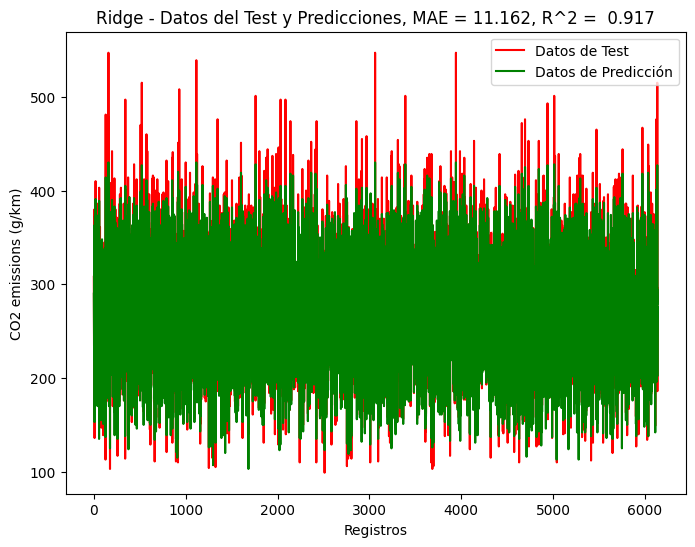

In [209]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testLR, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Ridge - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testLR, r2_testLR))
plt.legend()
plt.show()

### Modelo de Regresión - SVR

In [210]:
# X_train, X_test, y_train, y_test

import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

In [212]:
SEED = 42
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressorSVR = SVR( )
regressorSVR

SVR()

In [213]:
# Parámetros para el SVR
param_distSVR = {
    "C": stats.uniform(1, 100),  # Penalty parameter C of the error term
    "epsilon": stats.uniform(0, 1),  # Epsilon in the epsilon-SVR model
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  # Specifies the kernel type to be used in the algorithm
    "degree": stats.randint(2, 5),  # Degree of the polynomial kernel function ('poly')
    "gamma": ["scale", "auto"]  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

In [ ]:
# RandomizedSearchCV
random_search_SVR = RandomizedSearchCV(estimator=regressorSVR, param_distributions=param_distSVR,
                                       n_iter=100, cv=2, #scoring='neg_mean_squared_error',
                                       n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_SVR.fit(X_train, y_train)

In [ ]:
# Mejor estimador encontrado
print("Mejor estimador encontrado:")
print(random_search_SVR.best_estimator_)

# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_SVR.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_SVR.best_score_)

In [ ]:
# Seleccionando los mejores estimadores
best_randomSVR = random_search_SVR.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomSVR.fit(X = X_train, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainSVR = best_randomSVR.predict(X = X_train)
y_pred_testSVR = best_randomSVR.predict(X = X_test)

In [ ]:
# Redondeando el resultado de predicciones train para convertirlo a entero
y = np.rint(y_pred_trainSVR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_trainSVR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_trainSVR[y_pred_trainSVR< 0] = 0
y_pred_trainSVR

In [ ]:
# Redondeando el resultado de predicciones test para convertirlo a entero
y = np.rint(y_pred_testSVR) # Redondeando
y = y.astype(int) # Cast a int

y_pred_testSVR = np.hstack(y)

# Cambiar valores negativos a cero
y_pred_testSVR[y_pred_testSVR< 0] = 0
y_pred_testSVR

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosSVR_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainSVR})

# Imprimir el DataFrame con los resultados
print(df_resultadosSVR_train)


In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosSVR_test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_testSVR})

# Imprimir el DataFrame con los resultados
print(df_resultadosSVR_test)


In [ ]:
# Evaluación con las métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE de train (Mean Absolute Error, MAE)
mae_trainSVR = mean_absolute_error(y_train, y_pred_trainSVR)
print ('Métrica MAE de train', mae_trainSVR)

# MAE de test (Mean Absolute Error, MAE)
mae_testSVR = mean_absolute_error(y_test, y_pred_testSVR)
print ('Métrica MAE de validation', mae_testSVR)

# MSE de train (Mean Squared Error, MSE)
mse_trainSVR = mean_squared_error(y_train, y_pred_trainSVR)
print(mse_trainSVR)

# MSE de test (Mean Squared Error, MSE)
mse_testSVR = mean_squared_error(y_test, y_pred_testSVR)
print(mse_testSVR)

# R² de train (Coeficiente de determinación, R²)
r2_trainSVR = r2_score(y_train, y_pred_trainSVR)
print(r2_trainSVR)

# R² de test (Coeficiente de determinación, R²)
r2_testSVR = r2_score(y_test, y_pred_testSVR)
print(r2_testSVR)


In [ ]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 4))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testSVR, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('RandomForestRegressor - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testSVR, r2_testSVR))
plt.legend()
plt.show()

### Modelo de Regresión - DecisionTreeRegressor

In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
SEED = 42
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressorDTR = DecisionTreeRegressor(random_state=random_state)

In [ ]:
# Parámetros para el Decision Tree Regressor
param_distDTR = {
    "max_features": ['auto', 'sqrt', 'log2'],  # Número de características a considerar para el mejor split
    "max_depth": [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Máximo número de niveles en el árbol
    "min_samples_split": stats.randint(2, 20),  # Mínimo número de muestras requeridas para dividir un nodo
    "min_samples_leaf": stats.randint(1, 20),  # Mínimo número de muestras requeridas para estar en un nodo hoja
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"]  # Función de medida para el split
}

In [ ]:
# RandomizedSearchCV
random_search_DTR = RandomizedSearchCV(estimator=regressorDTR, param_distributions=param_distDTR,
                                       n_iter=100, cv=10, scoring='neg_mean_squared_error',
                                       n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_DTR.fit(X_train, y_train)

In [ ]:
# Mejor estimador encontrado
print("Mejor estimador encontrado:")
print(random_search_DTR.best_estimator_)

# Mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(random_search_DTR.best_params_)

# Mejor score obtenido
print("Mejor score obtenido:")
print(random_search_DTR.best_score_)

In [ ]:
# Seleccionando los mejores estimadores
best_randomDTR = random_search_DTR.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomDTR.fit(X = X_train, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainDTR = best_randomDTR.predict(X = X_train)
y_pred_testDTR = best_randomDTR.predict(X = X_test)

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosDTR_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainDTR})

# Imprimir el DataFrame con los resultados
print(df_resultadosDTR_train)


In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosDTR_test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_testDTR})

# Imprimir el DataFrame con los resultados
print(df_resultadosDTR_test)

In [ ]:
# Evaluación con las métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE de train (Mean Absolute Error, MAE)
mae_trainDTR = mean_absolute_error(y_train, y_pred_trainDTR)
print ('Métrica MAE de train', mae_trainDTR)

# MAE de test (Mean Absolute Error, MAE)
mae_testDTR = mean_absolute_error(y_test, y_pred_testDTR)
print ('Métrica MAE de validation', mae_testDTR)

# MSE de train (Mean Squared Error, MSE)
mse_trainDTR = mean_squared_error(y_train, y_pred_trainDTR)
print(mse_trainDTR)

# MSE de test (Mean Squared Error, MSE)
mse_testDTR = mean_squared_error(y_test, y_pred_testDTR)
print(mse_testDTR)

# R² de train (Coeficiente de determinación, R²)
r2_trainDTR = r2_score(y_train, y_pred_trainDTR)
print(r2_trainDTR)

# R² de test (Coeficiente de determinación, R²)
r2_testDTR = r2_score(y_test, y_pred_testDTR)
print(r2_testDTR)


In [ ]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 4))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testDTR, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('RandomForestRegressor - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testDTR, r2_testDTR))
plt.legend()
plt.show()

### Modelo de Regresión - RandomForestRegressor

In [ ]:
# X_train, X_test, y_train, y_test

import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [169]:
SEED = 42
random_state = SEED

# Instanciamos el modelo, Se carga el regresor
regressor = RandomForestRegressor(random_state=random_state)
regressor

RandomForestRegressor(random_state=42)

In [168]:
# Parámetros para el Random Forest
param_distRF = {
    "n_estimators": [4, 8, 16, 32, 64, 128], # Número de árboles en random forest
    "max_features": ['sqrt','log2'], # Features a considerar en el split
    "max_depth": [16, 12, 8, 4, 2, None], # Máximo número de niveles en el árbol
    "min_samples_split": stats.randint(2, 50), # Mínimo número de ejemplos requeridos en el split
    "min_samples_leaf": stats.randint(1, 50), # Mínimo número de ejemplos requeridos en cada leaf node
    "bootstrap": [True, False], # Método de selección de ejemplos para el entrenamiento de cada árbol
    "criterion": ["squared_error", "absolute_error"] # Criterio de evaluación
}

In [ ]:
# RandomizedSearchCV
random_search_RF = RandomizedSearchCV(estimator=regressor, param_distributions=param_distRF,
                                      n_iter=100, cv=10, scoring='neg_mean_squared_error',
                                      n_jobs=-1, verbose=4, random_state=random_state)

# Se realiza el entrenamiento
random_search_RF.fit(X_train, y_train)

In [ ]:
# Mejor estimador encontrado
print("Mejor estimador encontrado:")
print(random_search_RF.best_estimator_)

# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(random_search_RF.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_RF.best_score_)

In [ ]:
# Seleccionando los mejores estimadores
best_randomRF = random_search_RF.best_estimator_

# Se realiza el entreanamiento (fit)
best_randomRF.fit(X = X_train, y = y_train)

# Se realiza la predicción (predict)
y_pred_trainRF = best_randomRF.predict(X = X_train)
y_pred_testRF = best_randomRF.predict(X = X_test)

In [ ]:
# Creando un DataFrame para mostrar y_train junto con las predicciones y_pred_trainRF
df_resultadosRF_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_trainRF})

# Imprimir el DataFrame con los resultados
print(df_resultadosRF_train)

In [ ]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosRF_test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_testRF})

# Imprimir el DataFrame con los resultados
print(df_resultadosRF_test)

In [ ]:
# Evaluación con las métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE de train (Mean Absolute Error, MAE)
mae_trainRF = mean_absolute_error(y_train, y_pred_trainRF)
print ('Métrica MAE de train', mae_trainRF)

# MAE de test (Mean Absolute Error, MAE)
mae_testRF = mean_absolute_error(y_test, y_pred_testRF)
print ('Métrica MAE de validation', mae_testRF)

# MSE de train (Mean Squared Error, MSE)
mse_trainRF = mean_squared_error(y_train, y_pred_trainRF)
print(mse_trainRF)

# MSE de test (Mean Squared Error, MSE)
mse_testRF = mean_squared_error(y_test, y_pred_testRF)
print(mse_testRF)

# R² de train (Coeficiente de determinación, R²)
r2_trainRF = r2_score(y_train, y_pred_trainRF)
print(r2_trainRF)

# R² de test (Coeficiente de determinación, R²)
r2_testRF = r2_score(y_test, y_pred_testRF)
print(r2_testRF)

In [ ]:
import matplotlib.pyplot as plt

# Graficando y_test y y_predf
plt.figure(figsize=(8, 4))
plt.plot(y_test, label='Datos de Test', color='red')
plt.plot(y_pred_testRF, label='Datos de Predicción', color='green')
plt.xlabel('Registros')
plt.ylabel('CO2 emissions (g/km)')
plt.title('RandomForestRegressor - Datos del Test y Predicciones, MAE = %6.3f, R^2 = %6.3f' % (mae_testRF, r2_testRF))
plt.legend()
plt.show()

### Modelo de Regresión - GradientBoostingRegressor

### Modelo de Regresión - AdaBoostRegressor

## Interpretación y Resultados

In [221]:
# Imports de librería
import pandas as pd

# Crear el diccionario
resultado_modeloLR = {
    'Modelo': '1',
    'Algoritmo': 'Ridge',
    'MAE_train': mae_trainLR,
    'MSE_train': mse_trainLR,
    'R2_train': r2_trainLR,
    'MAE_test': mae_testLR,
    'MSE_test': mse_testLR,
    'R2:test': r2_testLR
}

# Crear el DataFrame a partir del diccionario
dataframeMo = pd.DataFrame([resultado_modeloLR])
dataframeMo

,Modelo,Algoritmo,MAE_train,MSE_train,R2_train,MAE_test,MSE_test,R2:test
0,1,Ridge,10.900824,315.740467,0.919953,11.161805,328.171093,0.916879


In [126]:
# Métricas

# Imports de librería
import pandas as pd

# Crear el diccionario
resultado_modeloLR = {
    'Modelo': '1',
    'Algoritmo': 'Ridge',
    'MAE_test': mae_testLR,
    'MSE_test': mse_testLR,
    'R2': r2_testLR
}

# Crear el DataFrame a partir del diccionario
dataframeMo = pd.DataFrame([resultado_modeloLR])

# Crear el diccionario
resultado_modeloSVR = {
    'Modelo': '2',
    'Algoritmo': 'SVR',
    'MAE_test': mae_testSVR,
    'MSE_test': mse_testSVR,
    'R2': r2_testSVR
}

# Agrega un registro al DataFrame a partir del diccionario
dataframeMo = dataframeMo.append(resultado_modeloSVR, ignore_index=True)

# Crear el diccionario
resultado_modeloDTR = {
    'Modelo': '3',
    'Algoritmo': 'DTR',
    'MAE_test': mae_testDTR,
    'MSE_test': mse_testDTR,
    'R2': r2_testDTR
}

# Agrega un registro al DataFrame a partir del diccionario
dataframeMo = dataframeMo.append(resultado_modeloDTR, ignore_index=True)

# Crear el diccionario
resultado_modeloRF = {
    'Modelo': '4',
    'Algoritmo': 'RF',
    'MAE_test': mae_testRF,
    'MSE_test': mse_testRF,
    'R2': r2_testRF
}

# Agrega un registro al DataFrame a partir del diccionario
dataframeMo = dataframeMo.append(resultado_modeloRF, ignore_index=True)